# **Ocean Proximity Challenge**

## **Prediccion de la proximidad al océano de un conjunto de viviendas en California**.


**Referencia Kaggle:**: [Kaggle Notebook](!https://www.kaggle.com/camnugent/california-housing-prices)


**Contenido**
* [importación de librerías y globales ](#section1)
* [obtención del dataset](#section2)
* [visualizar distribución](#section3)
    * Quitamos variables altamente correlacionadas linearmente
    * Creamos nuevas variables independientes para no perder información
* [limpieza y normalización](#section4)
    * Decidimos qué hacemos con los nulos
* [analizar las relaciones de la información del dataset](#section5)
* [análisis de la columna de labels](#section6)
    * importación de layers, callbacks, metrics y optimizersç
* [predicciones con el set de testeo](#section7)
* [evaluación del modelo](#section8)


----
<a name="section1"></a>

### importación de librerias


*Importaremos* las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), pulsa el play de la izquierda o **Ctrl + Enter**.

In [1]:
!pip install geopandas 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
drive_mount_folder = '/content/drive'
root_dir = '/MyDrive/satAI/week_01/challenge/'

In [4]:
from google.colab import drive
drive.mount(drive_mount_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----
<a name="section2"></a>

### obtención del dataset y previsualización de la información.

In [5]:
df = pd.read_csv(f'{drive_mount_folder}{root_dir}/data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Variables

* **longitude:** Valor longitude de la coordenada.
* **latitude:** Valor latitude de la coordenada.
* **housing_median_age:** Edad media de las viviendas de esta zona.
* **total_rooms:** Total de habitaciones.
* **total_bedrooms:** Total de camas.
* **population:** Población en esta zona. Importante denotar que también es un valor total.
* **households:** Viviendas en esta zona. Importante denotar que también es un valor total.
* **median_income:** Salario medio de las personas de esta zona.
* **median_house_value:** Valor medio de la vivienda de esta zona.
* **ocean_proximity:**: la métrica target.


----
<a name="section3"></a>

### análisis de datos

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

In [6]:
df.shape

(20640, 10)

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualicemos el contenido para hacernos una idea de la distribución de las viviendas por población y precio.

*   Es la zona de California, y al suroeste donde terminan los círculos, comieza el océano.
*   El precio se indica con color rojo para las viviendas más caras.
*   Las viviendas más cercanas al océano se encuentran por lo tanto en la costa de California.

<Figure size 720x504 with 0 Axes>

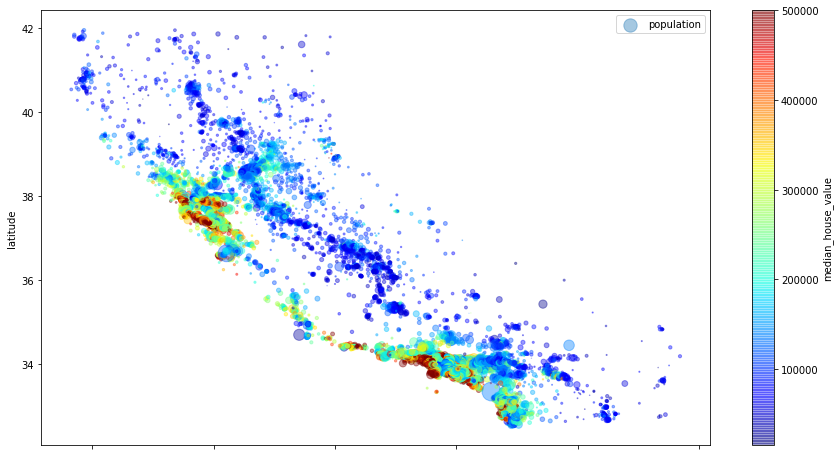

In [8]:
plt.figure(figsize=(10,7))
plotter = df.copy()
plotter.plot(
    kind="scatter", x="longitude", y="latitude", 
             alpha=0.4, s=plotter["population"]/100, label="population", 
             figsize=(15,8), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True
)
plt.legend()

----
<a name="section4"></a>

### limpiar y normalizar la información del dataset

Como futura lectura, recomendamos el siguiente enlace con [técnicas de mejora del dato](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data).



* Qué hacemos con los valores nulos: vamos a quitarlos.

In [9]:
# Sólo con una línea de código
df.isna().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.dropna(how = 'any', axis = 'index', inplace = True)

----
<a name="section5"></a>

### analizar las relaciones de la información del dataset

**A mayor cercanía de la costa, mayor valor**; esto se ve obteniendo el valor medio unitario por habitación y lo clasificamos según la categorización de cercanía al mar




In [11]:
# voy a añadir el valor de precio unitario por rooms (para desvincular del tamaño de la vivienda)
# $/n_rooms
df['median_house_value_by_rooms'] = df['median_house_value'] / df['total_rooms']

aggdf = df[['ocean_proximity', 'median_house_value_by_rooms']].groupby('ocean_proximity').agg(['min', 'max', 'mean', 'count'])
aggdf

median_house_value_by_rooms                                
                                        min           max        mean count
ocean_proximity                                                            
<1H OCEAN                          3.641156  22500.000000  160.283393  9034
INLAND                             2.255639  68750.000000  117.289168  6496
ISLAND                           141.043724    451.807229  287.767762     5
NEAR BAY                          12.031746  62500.125000  216.399820  2270
NEAR OCEAN                         1.595445  23333.333333  181.834438  2628

Viendo las medias, el valor más bajo está en la categoría `INLAND` con **117 e/n_rooms**; mientras que los vamores más elevados están en `NEAR BAY` y `ISLAND` con **220-285 e/n_rooms**.

Text(0, 0.5, 'median_house_value')

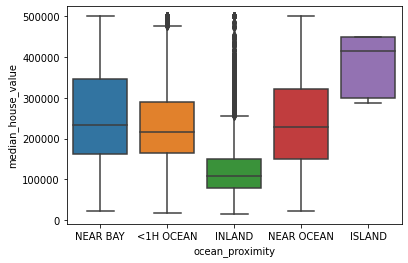

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

sns.boxplot(x=df.ocean_proximity, y=df['median_house_value'], ax=ax)

ax.set_xlabel('ocean_proximity')
ax.set_ylabel('median_house_value')

* El precio de la vivienda en `INLAND` es más barato, pero hay muchos outliers por encima del Q75%.
* Las casas en las islas son mucho más caras que en el resto de casos y el precio entre las casas es semejante; aunque con sólo 5 casos no podemos sacar ninguna conclusión.
* Para los casos de `NEAR BAY` y `NEAR OCEAN` la distribución es muy semejante.

In [13]:
# ---- GEOSPATIAL
# Podemos generalizar los puntos
# cuantos menos decimales tiene una coordenada, más area está representando
# es una forma de ''regionalizar'' por ubicación
df['longitude'] = df['longitude'].apply(lambda d: np.round(d, 1))
df['latitude'] = df['latitude'].apply(lambda d: np.round(d, 1))

df[['longitude','latitude']].describe().loc[['mean', 'max', 'min']]

,longitude,latitude
mean,-119.570386,35.63418
max,-114.300000,42.00000
min,-124.400000,32.50000


In [14]:
print(df['longitude'].value_counts().size)
print(df['latitude'].value_counts().size)

99
96


In [15]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_by_rooms
0,-122.2,37.9,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,514.318182
1,-122.2,37.9,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,50.500070


Vamos a ver las **correlaciones lineales entre datos**: 

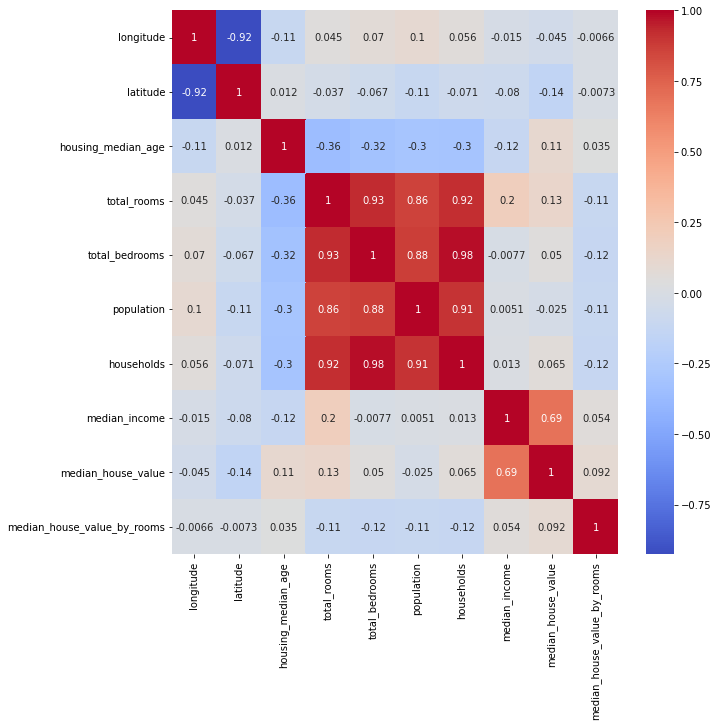

In [16]:
# Dos líneas de código
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax = ax)
plt.show()

In [17]:
# features a agrupar:
# --------------------------------------------------------------------------------
# total_rooms, total_bedrooms, population, households  
# -> hay 4 relacionadas -> se pueden obtener 3 independientes
# median_income es la variable más relacionada con el precio de una casa
# la columna target no aparece en la matriz de correlaciones

In [18]:
df[df['total_rooms'] < df['total_bedrooms']].shape[0] == 0
# no debería haber viviendas con más bedrooms que rooms 

True

In [19]:
# obtenemos los valores unitarios
df['ratio_population_by_households'] = df['population'] / df['households'] # ratio_population_by_households
df['ratio_rooms_by_households'] = df['total_rooms'] / df['households']
df['ratio_bedrooms'] = df['total_bedrooms'] / df['total_rooms']           # altamente relacionado con 'households

In [20]:
# por ultimo, eliminamos las columnas que nos sobram
df = df.drop(columns=['population', 'total_bedrooms', 'total_rooms'])

Nueva matriz de correlaciones para ver las nuevas feature añadidas y su correlación:

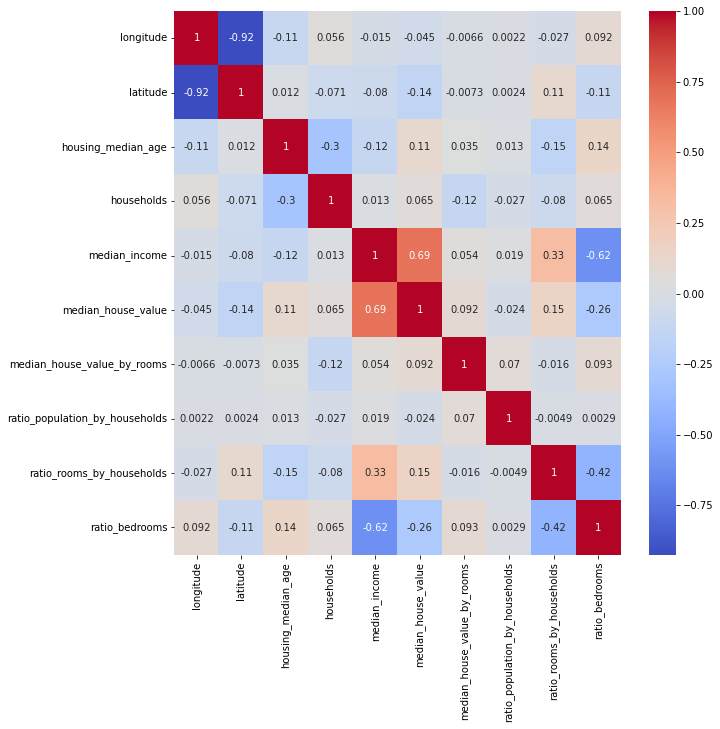

In [21]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax = ax)
plt.show()

----
<a name="section6"></a>

### análisis de la columna de labels


In [22]:
df['ocean_proximity'].nunique()

5

In [23]:
np.round(df['ocean_proximity'].value_counts() * 100 / df.shape[0], 2)

<1H OCEAN     44.21
INLAND        31.79
NEAR OCEAN    12.86
NEAR BAY      11.11
ISLAND         0.02
Name: ocean_proximity, dtype: float64

Casi la mitad de los valores 44% estan en <1h Ocean; 
  * Inland es que están sobre el continent
  * Podemos dejar caer las que están en islas, al ser outliers en su ubicación




In [24]:
# string transformation -> to snakecase
df['ocean_proximity'] = df['ocean_proximity'].str.replace(' ', '_').str.lower()

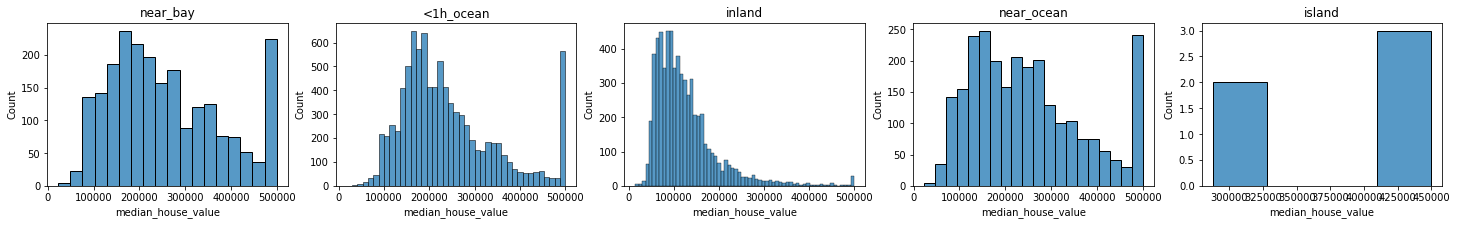

In [25]:
# Se podría agrupar las categorías que podrían ser la misma
# Vamos a ver la distribución de éstas para ver si existe alguna forma de simplificar la categorización
f, ax = plt.subplots(ncols = df['ocean_proximity'].nunique(), figsize = (25,3))

for i, ocean_cat in enumerate(df['ocean_proximity'].unique()):
  sns.histplot(data=df[df['ocean_proximity'] == ocean_cat], x = 'median_house_value', ax = ax[i])
  ax[i].set_title(ocean_cat)

plt.show()

Las que están muy cerca del mar tienen una distribución muy parecida y <1h_ocean está a medio camino entre inland y near_bay.

Como las distribuciones son tan parecidas, podemos agrupar las categorías en tres tipos:
* near_ocean =  near_bay + near_ocean + island
* less_1h_to_ocean
* inland 

Quitándonos los casos de las islas, pues podemos considerarlos outliers

In [26]:
# nos quitamos island
df = df[df['ocean_proximity'] != 'island'].copy(deep=True)

def new_categorization(c):
  if c in ['near_bay', 'near_ocean']:
    return 'near_ocean'
  elif c in ['<1h_ocean']:
    return 'less_1h_to_ocean'
  elif c in ['inland']:
    return 'far_ocean'
  
df['ocean_proximity'] = df['ocean_proximity'].apply(new_categorization)

In [27]:
df['ocean_proximity'].value_counts()

less_1h_to_ocean    9034
far_ocean           6496
near_ocean          4898
Name: ocean_proximity, dtype: int64

----
<a name="section7"></a>

### feature engineering

Aquí vamos a ver dos cosas:
* La distribución de los datos, para ver si una transformación lineal puede hacerlos más normalizados; eso ayuda un poco a los algoritmos a aprender mejor.
* Dado que tenemos la longitud y la latitud en round(1) podemos obtener una aproximación de la densidad urbana, clasificando las zonas en tres zonas


In [28]:
"""
g = sns.PairGrid(df, diag_sharey=False, corner=True, hue="ocean_proximity")

g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
"""

'\ng = sns.PairGrid(df, diag_sharey=False, corner=True, hue="ocean_proximity")\n\ng.map_lower(sns.scatterplot)\ng.map_diag(sns.kdeplot)\n'

Vamos a ver la distribución:

Del gráfico podemos observar lo siguiente:
* Algunas columnas  tienen una distribución claramente logarítmica:
  * ratio_population_by_households
  * median_house_value_by_rooms
  * ratio_rooms_by_households
  * ratio_bedrooms
  * households
  Siendo las dos últimas las que menos



In [29]:
log_cols = ['ratio_rooms_by_households']

df[log_cols] = df[log_cols].applymap(lambda c: np.log(c))

# se vuelve a ejecutar la celda superior por un PairGrid() es costoso para los recursos de la maquina

In [30]:
# volvemos a optener la poblacion
cdf = df[['ratio_population_by_households', 'households', 'median_income', 'latitude', 'longitude']].copy(deep=True)
cdf['population'] = cdf['ratio_population_by_households'] * cdf['households'] 

# redondeamos un poco más los puntos, para tener una categorización general
cdf[['latitude', 'longitude']] = cdf[['latitude', 'longitude']].apply(lambda r: np.round(r, 1))
cols_to_agg_spatialy = ['population', 'median_income']

cdf = cdf.groupby(['latitude', 'longitude'])[cols_to_agg_spatialy].agg({'population': 'sum', 'median_income': 'median'}).reset_index(drop=False)

cdf.shape

(1555, 4)

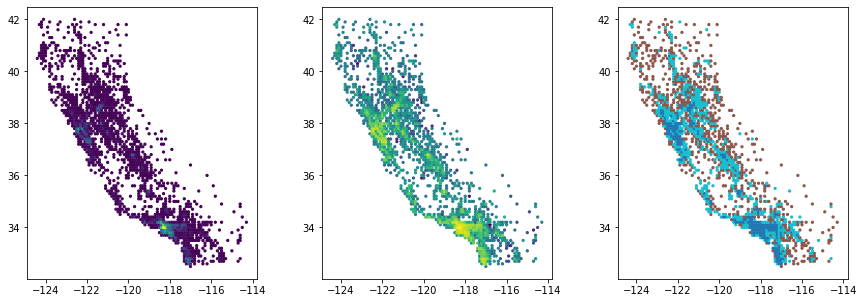

In [31]:
from shapely import wkt
from shapely.geometry import Point
proj_assumption = "EPSG:4326"  # webmercator

cdf = gpd.GeoDataFrame(cdf, geometry= gpd.points_from_xy(cdf['longitude'], cdf['latitude'], crs=proj_assumption))

# teniendo en cuenta la distribución normalizada de la población, vamos a clasificar en 3 gruopos: high_dens, med_dens y low_dens
# ya que los puntos hacen referencia a area, la suma de la población es similar a una dens poblacional
# los umbrales se han decidido viendo un poco el histplot y como quedaba la gráfica
Q_low = cdf['population'].quantile(.45)
Q_high = cdf['population'].quantile(.85)

cdf.loc[cdf['population'] < Q_low, 'dens_class'] = 'low_dens'
cdf.loc[cdf['population'].between(Q_low, Q_high), 'dens_class'] = 'med_dens'
cdf.loc[cdf['population'] > Q_high, 'dens_class'] = 'high_dens'

cdf['log_population'] =  cdf['population'].apply(lambda c: np.log(c))

# vamos a imprimir los puntos
# se ve la grid que hemos hecho a partir de np.round() de arriba
cols_to_plot = ['population', 'log_population', 'dens_class']

f, ax = plt.subplots(ncols = len(cols_to_plot), figsize = (5*3, 5))

for i, col in enumerate(cols_to_plot):
  cdf.plot(column=col, markersize= 5, ax = ax[i])
plt.show()

Las áreas más densamente pobladas son las cercanas al mar, a medida que uno se aleja, la población se dispersa, por lo que quizá la clasificación o el log_pop sean una métrica significativa

In [32]:
# nos hacemos una copia del df hasta validar
copydf = df.merge(
    cdf.set_index(['longitude', 'latitude'])[['log_population', 'dens_class']], 
    left_on = ['longitude', 'latitude'], 
    right_index=True
)

# se propó con las binarización de las categoricas; pero con log_pop es suficiente
copydf = pd.concat([ copydf, 
                     pd.get_dummies(copydf['dens_class'])
                   ], axis = 1)

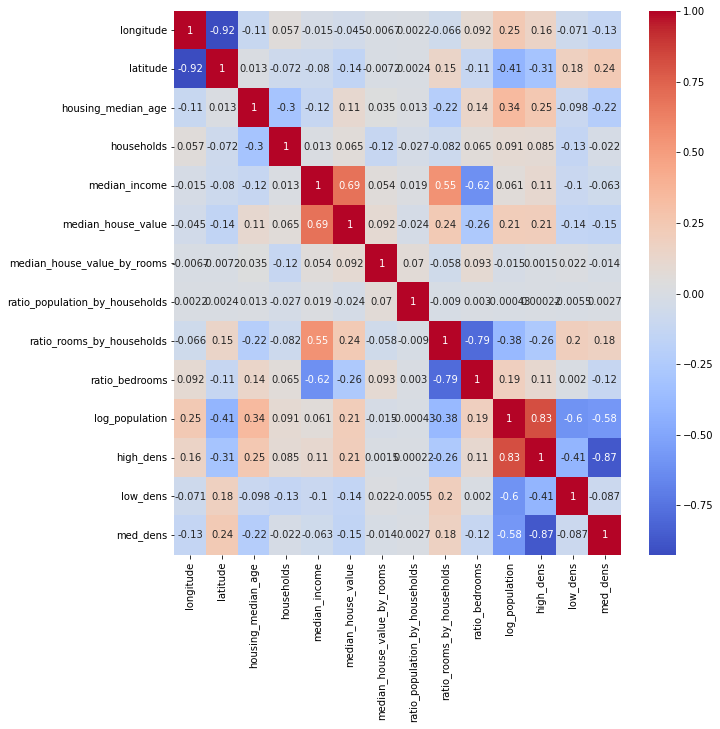

In [33]:
# vemos cómo nos quedan las correlaciones lineas con corr()

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(copydf.corr(), annot = True, cmap = 'coolwarm', ax = ax)

De esta matriz final, comparándola con la anterior (antes de añadir high_dens, low_dens, med_dens y hacer el logaritmo natural de `log_cols` podemos ver que:
  * La correlación lineal ente `median_income`, `median_house_value`, `median_house_value_by_rooms` y `ratio_rooms_by_households` queda más clara; aunque sólo las dos últimas fueron convertidas a su logaritmo.
  * `log_population` y de densidad están algo correlacionadas, lo cual es obvio dado que a mayor densidad mayor población, aunque la correlación es baja para lo esperado; quizá esto se deba a que la primera no es exactamente el logaritmo del num de población. Quizá se podría decir que log_pop sería una clasificación numérica de la densidad.
  * Hay 3 columnas que podrían ser objeto de una vuelta más (income, ratio_rooms_by_household y median_house_value; lo que daría a pensar qué columnas merece la pena hacer el logaritmo.
  * Las nuevas columnas añadidas no tienen una alta correlación con otras que ya estaban, y parecen añadir información nueva.

In [34]:
# de la matriz de correlacción de arriba; sobra la binarización de las categóricas

df = df.merge(copydf['log_population'], left_index=True, right_index=True)

----
<a name="section8"></a>

### preprocesamiento

Ahora procedemos a normalizar el resto de variables para que la escala de valores entre ellas sea similar y facilite el procesamiento a nuestro modelo y se logre mejorar la predicción.

Ya que la función de activación de nuestro modelo sera **softmax**, buscamos normalizar los valores en el **rango de 0..1.**

In [35]:
# Seis líneas de código (cómo mínimo)
feature_columns = [_ for _ in df.columns if _ != 'ocean_proximity']
target_feats    = [_ for _ in df.columns if _ == 'ocean_proximity']

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) 
df.loc[:, feature_columns] = scaler.fit_transform(df.loc[:, feature_columns])

df.describe()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,median_house_value_by_rooms,ratio_population_by_households,ratio_rooms_by_households,ratio_bedrooms,log_population
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,0.478150,0.329973,0.541759,0.081975,0.232517,0.395510,0.002240,0.001915,0.354365,0.125582,0.814647
std,0.198341,0.224982,0.246866,0.062872,0.130993,0.237963,0.012225,0.008401,0.053642,0.064423,0.144907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257426,0.147368,0.333333,0.045881,0.142308,0.215414,0.000703,0.001398,0.323691,0.083806,0.749095
50%,0.584158,0.189474,0.549020,0.067094,0.209487,0.339588,0.001206,0.001710,0.355628,0.114608,0.865538
75%,0.633663,0.547368,0.705882,0.099161,0.292698,0.514845,0.002012,0.002084,0.384110,0.155281,0.911886
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df[feature_columns].isna().sum()

longitude                         0
latitude                          0
housing_median_age                0
households                        0
median_income                     0
median_house_value                0
median_house_value_by_rooms       0
ratio_population_by_households    0
ratio_rooms_by_households         0
ratio_bedrooms                    0
log_population                    0
dtype: int64

----
<a name="section9"></a>

### modelo de red neuronal

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un modelo de red neuronal con Keras:
  - Tipo de modelo: [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *Sequential*
  - Añadir 7 capas Dense.
  - La primera capa densa llevará seteada el número de features con las que se entrena el modelo, sin contar con la que queremos averiguar.
  - Las seis primeras capas llevarán la función de activación 'relu'.
  - La última capa llevará la función de activación 'softmax'.
- Compilar el modelo con:
  - Los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
  - Función de activación: 'softmax'. [Pista](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=es-419)
  - Función de pérdida: 'categorical_crossentropy'. [Pista](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
  - Función de optimización: 'adam'. [Pista](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Entrenar el modelo con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento y los datos de validación.
- Determinar las conclusiones de los resultados obtenidos en el modelo.

18. Crea el set de datos de entrenamiento y validación necesarios para nuestro modelo

---

In [38]:
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
# Crea y , con un LabelEncoder para pasar a enteros los valores que tiene la feature que queremos averiguar
from sklearn.preprocessing import LabelBinarizer

index_shape = df.shape[0]
le = LabelBinarizer()

X = df.loc[:, feature_columns].values

y = le.fit_transform(df.loc[:, target_feats].values)  # ['A', 'B'] > [0, 1]; [[1,0], [0, 1]]
# NOTE: mejor si hubiese hecho un np.reshape() antes
# DataConversionWarning: A column-vector y was passed when a 1d array was expected.


# Crea el set de datos de entrenamiento y validación.
random_state_split = 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state = random_state_split, test_size = 0.25
)  # DATOS QUE EL MODELO NUNCA VA A VER 25%

X_ptrain, X_validation, y_ptrain, y_validation = train_test_split(
    X_train, y_train, 
    random_state = random_state_split, test_size = 0.15
)  # DATOS CON LOS QUE VAMOS A MEDIR EL MODELO 15%

In [39]:
assert X_ptrain.shape[0] + X_test.shape[0] + X_validation.shape[0]  == X.shape[0]
assert y_ptrain.shape[0] + y_test.shape[0] + y_validation.shape[0]  == y.shape[0]

* Compilamos el modelo anteriormente descrito

In [40]:
import keras.metrics as metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [41]:
N_CLASSES = y.shape[1]
N_FEATURES = X.shape[1]

In [45]:
def get_model(
    input_shape:tuple=(N_FEATURES,), 
    n_classes:int=N_CLASSES,
    rnn_neurons:int=6
    ):
    """ Funtion that instantiates a RNN using keras sequential API
    """
    # instantiate model
    model = Sequential()
    model.add(Input(shape=input_shape))

    # deep layers
    for i in range(rnn_neurons):
      model.add(Dense(8, name=f"fc_{i+1}", activation='relu'))
      # model.add(LeakyReLU(alpha=0.1, name=f"lrelu_{i+1}"))
    
    # output layer
    model.add(Dense(
        n_classes, 
        activation = 'softmax', 
        name = 'output')
    )
    return model


#####################
model = get_model()
optimizer = Adam(learning_rate = 0.001)
loss = CategoricalCrossentropy()

model.compile(
  optimizer=optimizer,  
  loss=loss,  
  metrics=["accuracy"] 
)

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc_1 (Dense)                (None, 8)                 96        
                                                                 
 fc_2 (Dense)                (None, 8)                 72        
                                                                 
 fc_3 (Dense)                (None, 8)                 72        
                                                                 
 fc_4 (Dense)                (None, 8)                 72        
                                                                 
 fc_5 (Dense)                (None, 8)                 72        
                                                                 
 fc_6 (Dense)                (None, 8)                 72        
                                                                 
 output (Dense)              (None, 3)                

*Explica los siguientes conceptos


- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'
> Secuencial quiere decir que tiene un único input y un único output (función inyectiva) con una sucesión lineal de capas; al ser el más sencillo y genérico es un buen punto de partida sobre el que ver si se necesita una arquitectura más específica.

- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar?
> input_dim tiene que ser el número de features que tenemos (== columnas) y no se debe contabilizar la capa de las target feature, la que se va a predecir.

- ¿Qué función de activación se ha seteado en la última capa?¿Por qué se ha elegido esa función de activación en la última capa?
> Softmax.
> * Usado para predicciones multicategóricas
> * Pasa de valores numericos a probabilidades
> * Y usado con OneHotEncoding 

- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida?
> Es el tipo de función de coste en caso de multiclasificación.

- ¿Qué significa la terminología de función de optimización?
> En qué se optimiza computacionalmente el descenso gradiente.


* Entrenamiento del modelo

In [47]:
fit_params = {
    'epochs': 64,
    'batch_size': 128,   # num de vectores por entrenamiento
    'verbose' : 1       # 1: nos va a imprimir el progress bar  | 2: one line per epoch. 
}


callbacks = [
    EarlyStopping(
        monitor="val_accuracy",
        restore_best_weights=True,
        patience=5
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=3
    ),
    ModelCheckpoint(
        "/content/drive/MyDrive/satAI/week_01/challenge/model/",
        monitor="val_accuracy",
        verbose=0,
        save_best_only=True,
        save_weights_only=False,
        mode="max"
    )
]

# ###################################################3 
history = model.fit(
    X_ptrain, y_ptrain, 
    validation_data = (X_validation, y_validation),
    callbacks = callbacks,
    **fit_params
)

Epoch 1/64
102/102 [==============================] - 4s 24ms/step - loss: 1.0782 - accuracy: 0.4091 - val_loss: 1.0612 - val_accuracy: 0.4350 - lr: 0.0010
Epoch 2/64
102/102 [==============================] - 0s 3ms/step - loss: 1.0294 - accuracy: 0.4417 - val_loss: 1.0037 - val_accuracy: 0.4350 - lr: 0.0010
Epoch 3/64
102/102 [==============================] - 2s 16ms/step - loss: 0.9806 - accuracy: 0.5024 - val_loss: 0.9375 - val_accuracy: 0.5337 - lr: 0.0010
Epoch 4/64
102/102 [==============================] - 2s 16ms/step - loss: 0.8947 - accuracy: 0.5854 - val_loss: 0.8590 - val_accuracy: 0.6090 - lr: 0.0010
Epoch 5/64
102/102 [==============================] - 2s 16ms/step - loss: 0.8181 - accuracy: 0.6514 - val_loss: 0.7873 - val_accuracy: 0.6559 - lr: 0.0010
Epoch 6/64
102/102 [==============================] - 2s 16ms/step - loss: 0.7492 - accuracy: 0.6759 - val_loss: 0.7373 - val_accuracy: 0.6768 - lr: 0.0010
Epoch 7/64
102/102 [==============================] - 2s 19ms/ste

In [48]:
# Evalua el modelo con los datos de X_test y Y_test
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=320)
print("test loss, test acc:", results)

Evaluate on test data
16/16 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8524
test loss, test acc: [0.3866930902004242, 0.8523595333099365]


In [56]:
y_test_pred = model.predict(X_test)

Da unos resultados aceptables para los datos que no ha visto.
* loss de **0.385** aprox y con una precisión de **85.25%**

----
<a name="section10"></a>

### visualización de resultados



In [49]:
display(history.history.keys()) # aqui se ve que tiene el modelo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [50]:
get_cols_by_str = lambda s, df: df.columns[df.columns.str.contains(s)]

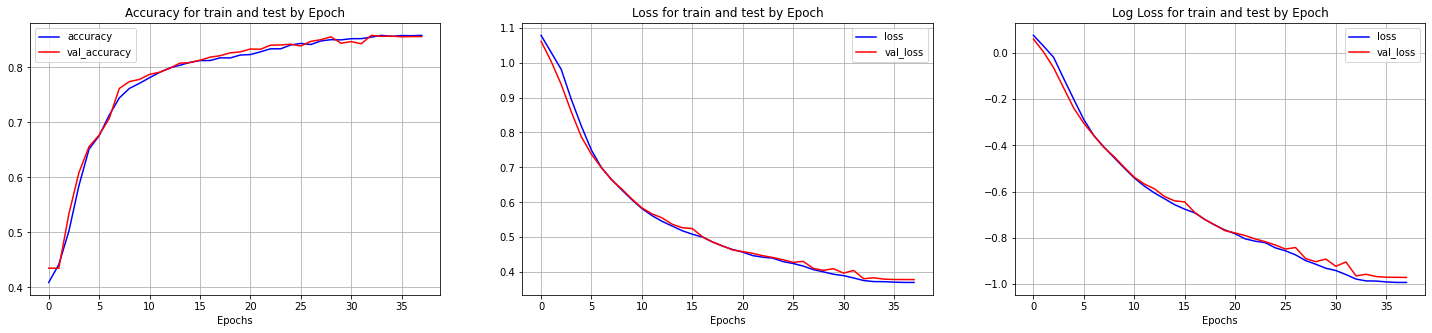

In [51]:
metrics = pd.DataFrame(history.history)

##############################
plot_args = {
    'color': ['blue','red'],
    'grid' : True,
    'xlabel': 'Epochs'
}

f, ax = plt.subplots(ncols = 3, figsize = (25,5))

metrics[get_cols_by_str(s='loss', df=metrics)].plot.line(ax = ax[1], title='Loss for train and test by Epoch', **plot_args)
metrics[get_cols_by_str(s='loss', df=metrics)].apply(np.log).plot.line(ax = ax[2], title='Log Loss for train and test by Epoch', **plot_args)
metrics[get_cols_by_str(s='accu', df=metrics)].plot.line(ax = ax[0], title='Accuracy for train and test by Epoch', **plot_args)

plt.show()

24. Analiza y explica qué indica la gráfica del modelo
---
- Gráfica de Accuracy
> Mide la performance thel algoritmo de una forma interpretable. En este caso, el accuracy mide cuantot de bien acierta el algoritmo en su classificación, haciendo uso de los parámetros.

- Gráfica de Loss
> El loss hace referencia al a función de categorical_crossentropy() que se usa para optimizar el algoritmo mediante el gradiente descenso.

Suma los errores realizados por los sets de entrenamiento y validación y habla sobre cuanto de bien está generalizando el modelo por cada iteración.

-----

Para este caso, se considera que se ha llegado a un buen modelo que ha conseguido saturar en torno a un loss de 0.385, llegando a tener una accuracy del 85%; la gráfica de los loss muestra que en las últimas iteraciones ya no estaba aprendiendo, por lo que el EarlyStopping estaba bien definido y los parámetros de val_ están algo peores que los de loss, pero cerca; por lo que no parece haber indicidios de overfitting()


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score 

In [57]:
print(classification_report(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1609
           1       0.83      0.87      0.85      2282
           2       0.76      0.72      0.74      1216

    accuracy                           0.85      5107
   macro avg       0.85      0.84      0.84      5107
weighted avg       0.85      0.85      0.85      5107



In [59]:
from itertools import product

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title = 'Confusion matrix, without normalization'

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Confusion matrix, with normalization'


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


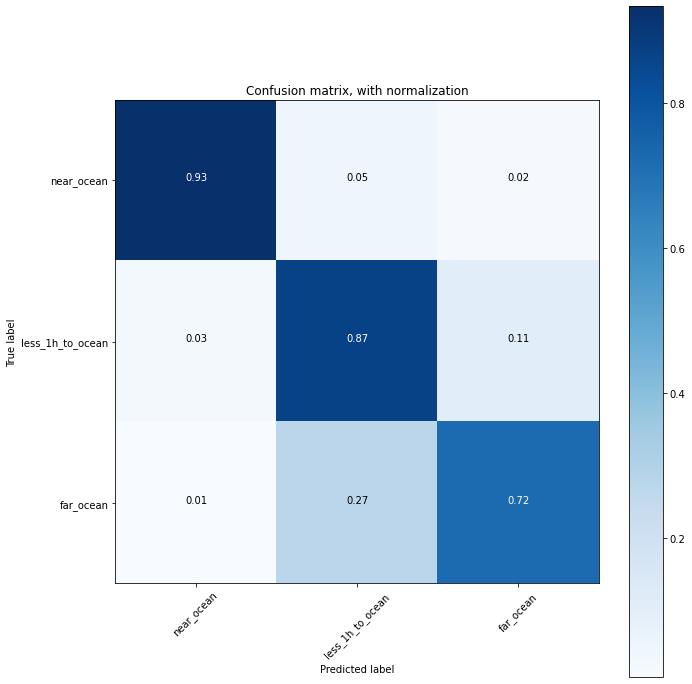

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=df['ocean_proximity'].unique(),
                      title='Confusion matrix, with normalization',
                      normalize=True)
plt.show()